<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


It is 60% since the only event which result in crossing the bridge safely is E3.

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

No, I don't agree with him. Once we capture a troll, we gain new information, which means event E3 cannot occur. To calculate the probability of crossing the bridge safely, we need to compute the posterior probability.

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

The knight need to consider E1 and E2 in his calculation.

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [11]:
# P(TC|E1) = 2/5
# P(TC|E2) = 1/5
# P(E1) = 1/5
# P(E2) = 1/5
# P(E1|TC)= (P(TC|E1)* P(E1)) / (P(TC|E1)* P(E1) +P(TC|E2) * P(E2)) = ((.4*.2)/((.4*.2)+(.2*.2))) = 2/3

P=((.4*.2)/((.4*.2)+(.2*.2)))

0.6666666666666666

Probability of the other event given a troll captured: 

In [12]:
# P(E2|TC)=(P(TC|E2)* P(E2)) / (P(TC|E2)* P(E2) +P(TC|E1) * P(E1))= ((.2*.2)/((.2*.2)+(.4*.2))) =1/3
P=((.2*.2)/((.2*.2)+(.4*.2)))

0.3333333333333333

### 1.5

#### What is the chance of the knight crossing safely?

In [4]:
# It is equal to P(E2|TC) = 1/3

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random", "Statistics"])

    Updating registry at `C:\Users\akram\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\akram\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random
import Statistics

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [4]:
x = collect(-10:1:10)
y_true = (x .^ 2) .+ (3 .* x) .- 2

21-element Vector{Int64}:
  68
  52
  38
  26
  16
   8
   2
  -2
  -4
  -4
  -2
   2
   8
  16
  26
  38
  52
  68
  86
 106
 128

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [5]:
using Random, Distributions, Statistics
d = Normal(0,10)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian

21-element Vector{Float64}:
  64.6551986376958
  52.77934931477418
  50.85794304384584
  24.009771295470866
  20.11341800986515
  -1.8538043567980704
  -8.967924684118174
  16.38621483031968
 -16.545353142883734
  -3.6843566013002165
   5.924410725756018
   8.371274396157968
   4.778486913288036
  21.256107756351067
  29.915030048591245
  48.85576584738331
  54.48313364503985
  73.09335670219815
 120.8505684269804
 105.94609616459778
 134.11237196108257

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

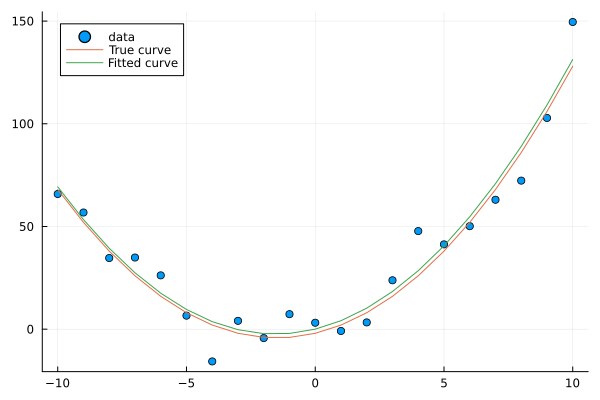

In [6]:
x = collect(-10:1:10)
y_true = (x .^ 2) .+ (3 .* x) .- 2
d = Normal(0,10)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian
using Plots
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True curve")
line_fit = Polynomials.fit(x,y_observed,2)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted curve")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

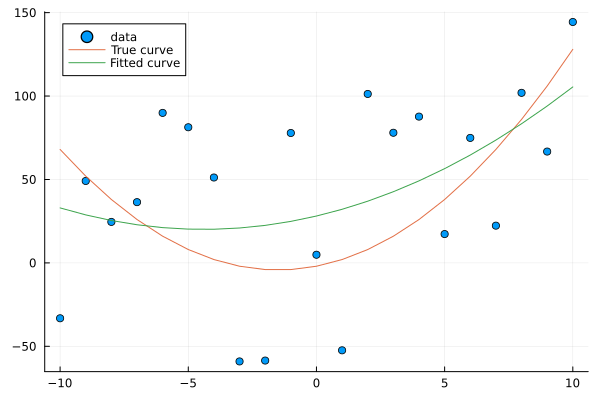

In [7]:
x = collect(-10:1:10)
y_true = (x .^ 2) .+ (3 .* x) .- 2
d = Normal(0,50)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian
using Plots
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True curve")
line_fit = Polynomials.fit(x,y_observed,2)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted curve")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The fit is not closer because the standard deviation is 50, which is higher than the standard deviation of 10 in question 2.3. This indicates that more error or noise is incorporated into the fit, resulting in a less accurate fit compared to the fit with a standard deviation of 10.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


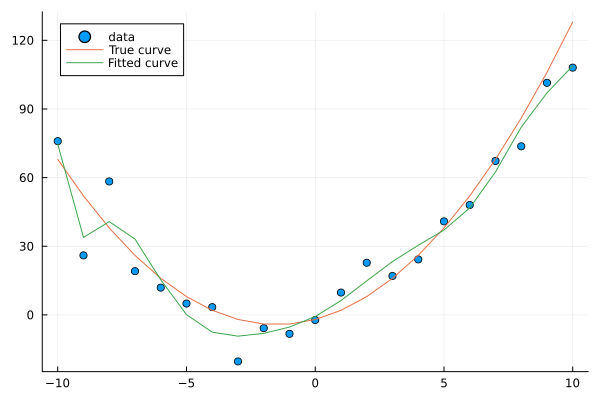

In [8]:
x = collect(-10:1:10)
y_true = (x .^ 2) .+ (3 .* x) .- 2
d = Normal(0,10)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian
using Plots
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True curve")
line_fit = Polynomials.fit(x,y_observed,10)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted curve")

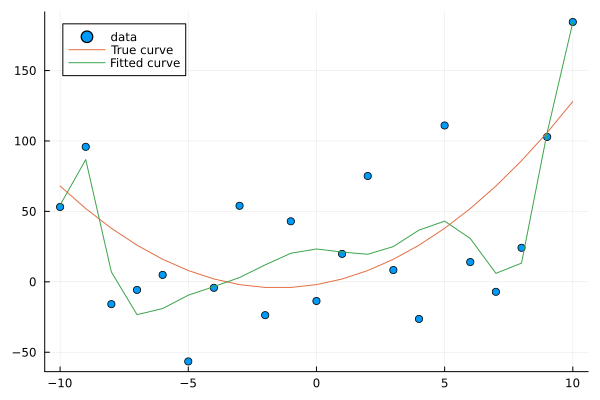

In [9]:
x = collect(-10:1:10)
y_true = (x .^ 2) .+ (3 .* x) .- 2
d = Normal(0,50)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian
using Plots
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True curve")
line_fit = Polynomials.fit(x,y_observed,10)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted curve")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


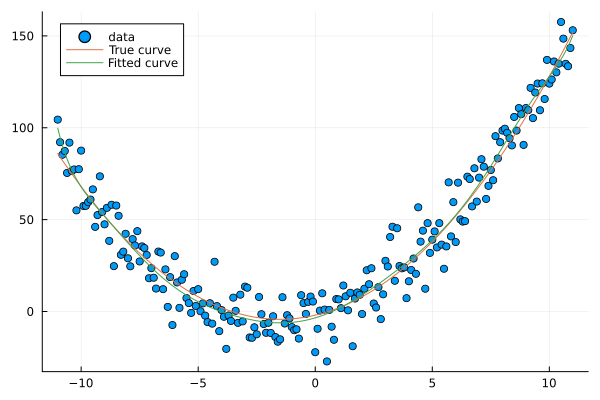

In [10]:
x = collect(-11:0.1:11)
y_true = (x .^ 2) .+ (3 .* x) .- 2
d = Normal(0,10)
gaussian = rand(d,length(x))
y_observed = y_true .+ gaussian
using Plots
scatter(x,y_observed, label="data")
plot!(x,y_true, label="True curve")
line_fit = Polynomials.fit(x,y_observed,10)
y_fitted = line_fit.(x)
plot!(x,y_fitted, label="Fitted curve")

3. What do you observe in the plot? What is this phenomenon called?

The 10th order polynomial attempted to fit each individual point in 2.5, leading to overfitting. By increasing the number of observed samples, the overfitting problem is mitigated that results in better fit in 2.6. 